In [1]:
from main import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
ls data/

robustness_100x25_v0/ robustness_200x50_v0/ simulation.prof
robustness_100x50_v0/ robustness_200x50_v1/


In [4]:
# load simulation results
file_path = 'data/robustness_200x50_v1/'
results = load_results_from_json(file_path)

In [5]:
print(results)

{0: {<modules.cells.Cell object at 0x1040856a0>: [0.18578261651185574, 42030045.905039154]}, 1: {<modules.cells.Cell object at 0x104011518>: [0.1308980699660308, 40759634.54714408], <modules.cells.Cell object at 0x106aafb38>: [0.2617941653829737, 40744384.19747091], <modules.cells.Cell object at 0x106ab6a58>: [0.09289080715765291, 42029883.63174419], <modules.cells.Cell object at 0x106aaf710>: [0.0928902339821388, 45346256.2593819], <modules.cells.Cell object at 0x106ab6080>: [0.12227531463341082, 40992396.884363756], <modules.cells.Cell object at 0x106ab65c0>: [0.2678550454910863, 39860077.232707165], <modules.cells.Cell object at 0x1040119e8>: [0.28425936385273787, 30956508.59012843]}, 2: {<modules.cells.Cell object at 0x106abd208>: [0.18949097437783474, 30801524.38572866], <modules.cells.Cell object at 0x104011550>: [0.12227531463341082, 40992396.884363756], <modules.cells.Cell object at 0x106ad0860>: [0.7730489857925452, 30784625.779053517], <modules.cells.Cell object at 0x106abdb7

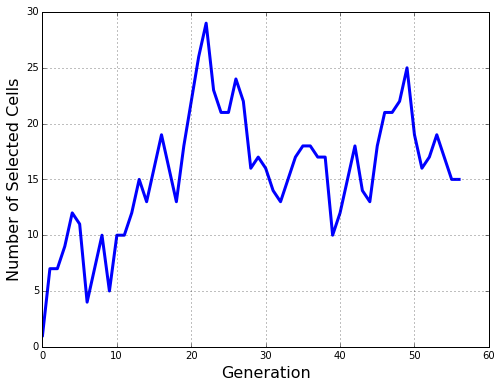

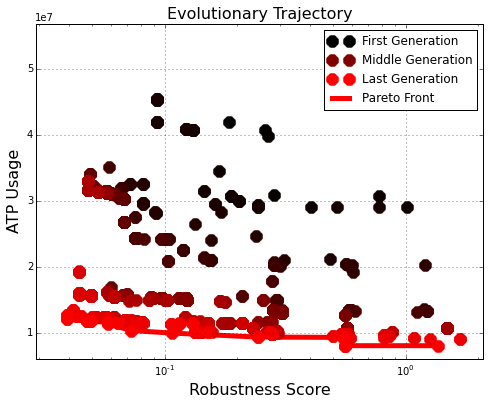

In [6]:
# plot population size
ax = plot_pareto_front_size(results)

# plot 2D evolutionary trajectory
ax = plot_2D_trajectory(results, obj=(0, 1), connect_front=True, labels=['Robustness Score', 'ATP Usage'])
# ax.set_ylim(4.6e7, 4.8e7)
ax.set_yscale('linear')

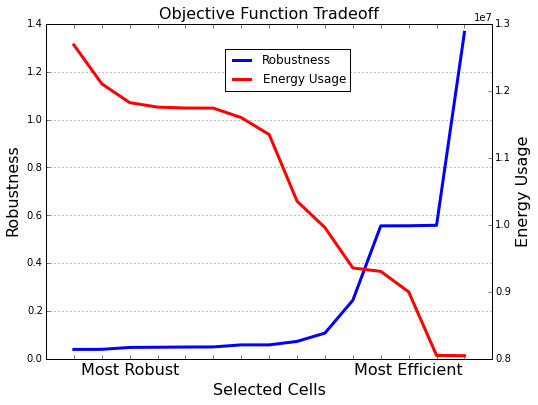

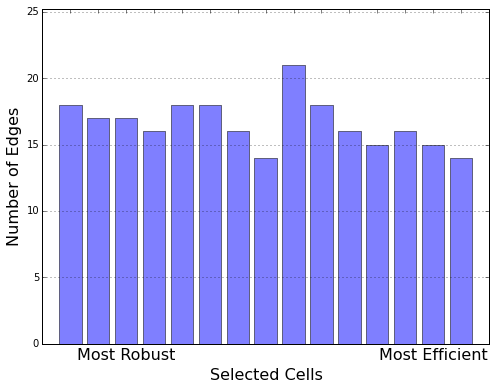

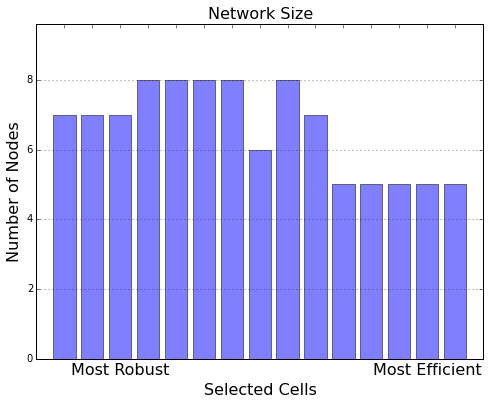

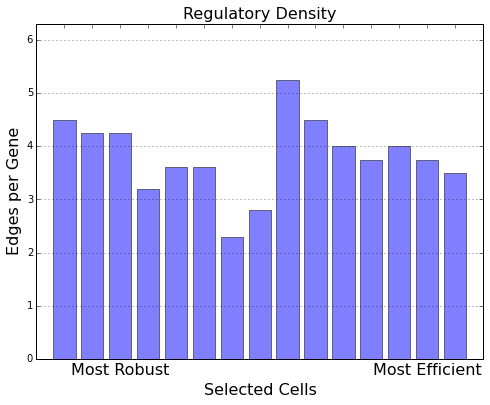

In [7]:
# get topological features from pareto front, ordered from most robust to most efficient
robustness, energy_usage, edge_count, node_count, edges_per_node, edges_per_gene = get_topology_from_front(results)
    
# plot edges vs position on pareto front

ax = plot_pareto_objective_tradeoff(metrics=[robustness, energy_usage], metric_names=['Robustness', 'Energy Usage'], plot_title='Objective Function Tradeoff')
    
# plot edges vs position on pareto front
ax = plot_metric(edge_count, 'Number of Edges')

# plot edges vs position on pareto front
ax1 = plot_metric(node_count, 'Number of Nodes', plot_title='Network Size')

# plot edges vs position on pareto front
ax2 = plot_metric(edges_per_gene, 'Edges per Gene', 'Regulatory Density')

In [ ]:
# plot edge type count vs rank
# plot downregulating edges  per input and downreg pet output on same pareto axis

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
modification           [1]          []         [7]
modification           [7]          []         [1]
catalytic_degradation  [1]          [7]        []
catalytic_degradation  [0]          [1]        []
catalytic_degradation  [0]          [7]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       7
repression                     1                       0
activation                     4                       0
repression                     2                       7
repression                     3                       7
repression                     0                       0
activation                     4                       0
activation                     3                       0
repression                     5                       1
repre

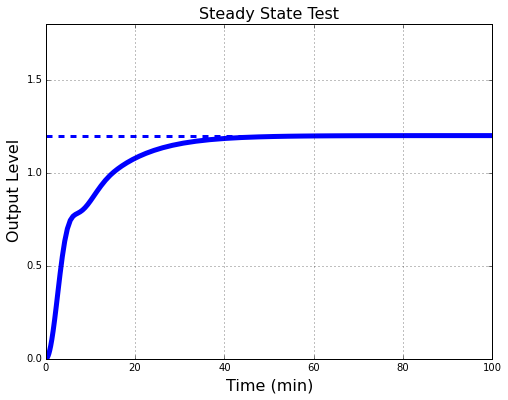

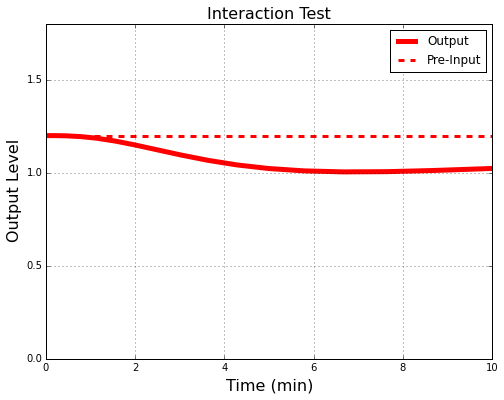

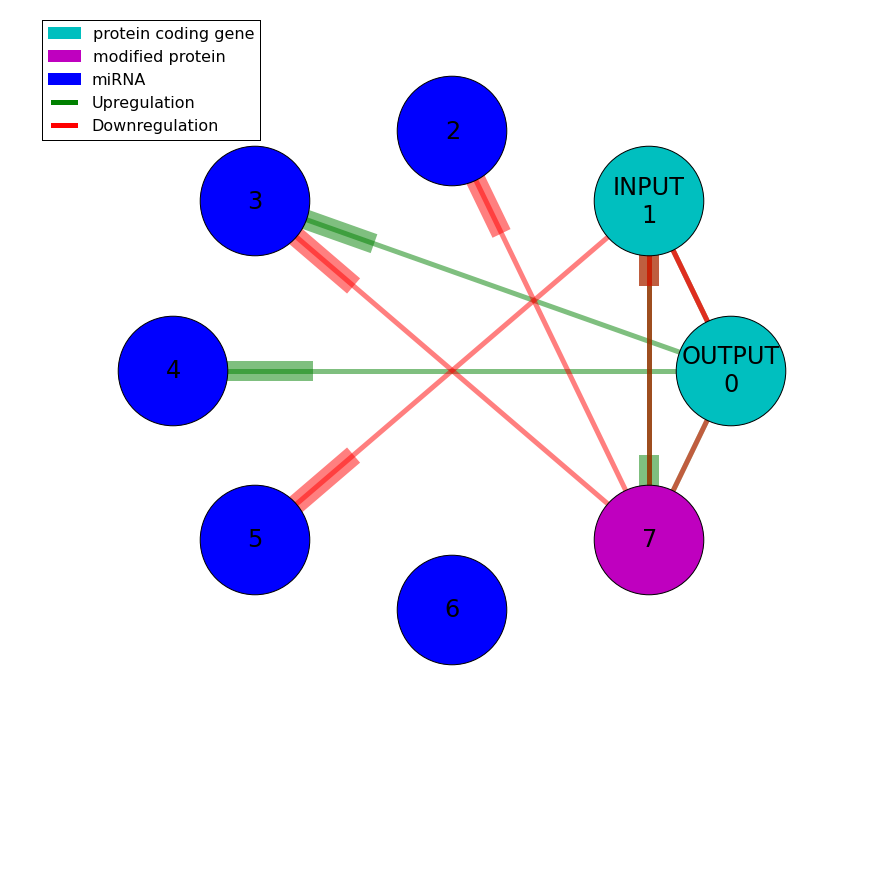

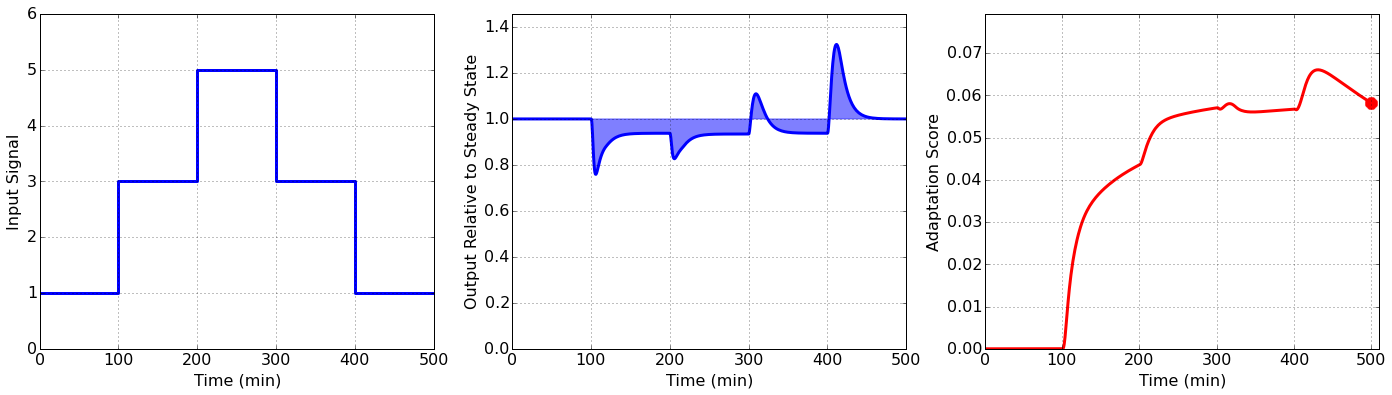

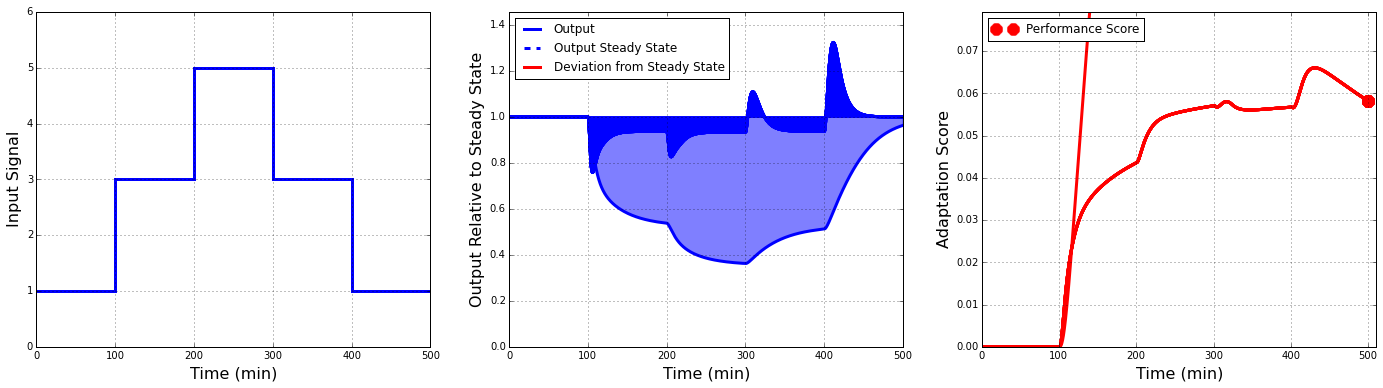

In [22]:
# analyze a single cell

# select a cell from the population
cell_num = 0
cell = list(results[len(results)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

# run robustness test
scores = robustness_test(cell, num_mutants=10, input_node=2, output_node=1, steady_states=None, plot=True)

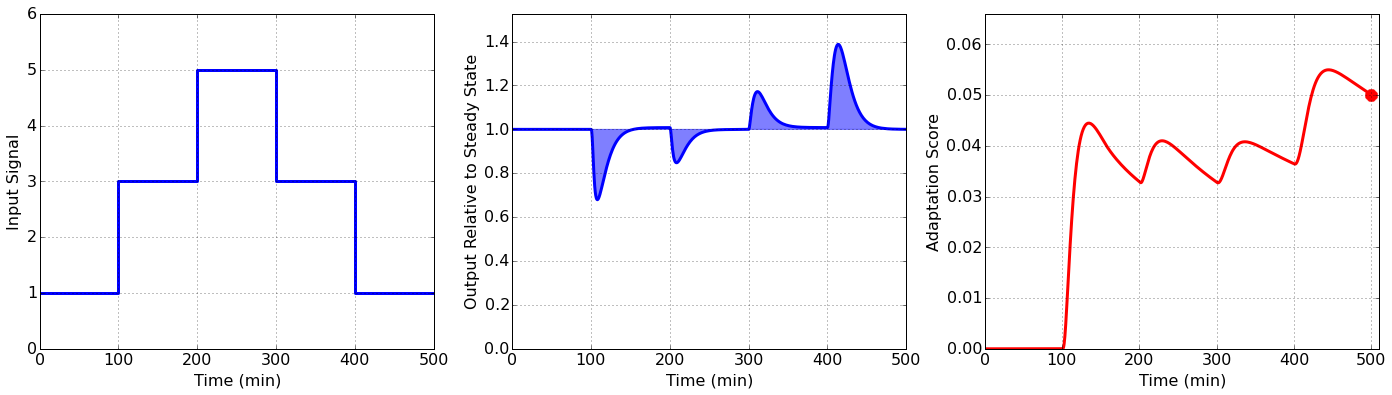

In [23]:
# select a cell from the population
cell_num = 10
cell = list(results[len(results)-1].items())[cell_num][0]

# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

In [25]:
score

0.037134745116632603

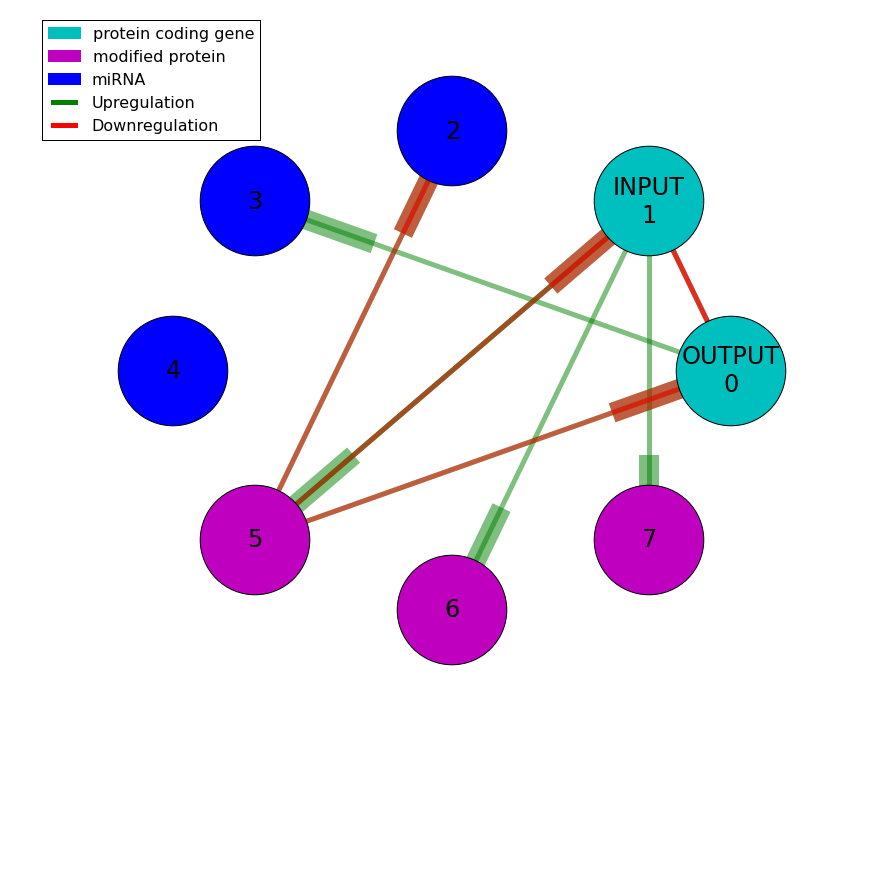

In [24]:
cell.show_topology(input_node=2, output_node=1)

In [25]:
cell.show_reactions(grn_indices=True)

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
modification           [1]          []         [5]
modification           [5]          []         [1]
catalytic_degradation  [1]          [5]        []
catalytic_degradation  [0]          [1]        []
catalytic_degradation  [0]          [5]        []
modification           [1]          []         [6]
modification           [1]          []         [7]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       5
repression                     1                       0
activation                     3                       0
repression                     2                       5
repression                     0                       0
activation                     3                       0
repression                     0                       0
activation       